In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
#the function reads data from csv
def read_data():
    temp=pd.read_csv('test(1).csv',sep='^',header=None,prefix='X')
    temp2=temp.X0.str.split(';',expand=True)
    del temp['X0']
    test_1=pd.concat([temp,temp2],axis=1)
    headers = test_1.iloc[0]
    test_1_new  = pd.DataFrame(test_1.values[1:], columns=headers)
    print('df 1 has {} rows and {} columns'.format(test_1.shape[0],test_1.shape[1]))

    
    temp_1=pd.read_csv('test(2).csv',sep='^',header=None,prefix='X')
    temp_2=temp_1.X0.str.split(';',expand=True)
    del temp_1['X0']
    test_2=pd.concat([temp_1,temp_2],axis=1)
    headers = test_2.iloc[0]
    test_2_new  = pd.DataFrame(test_2.values[1:], columns=headers)
    print('df 2 has {} rows and {} columns'.format(test_2.shape[0],test_2.shape[1]))

    return test_1_new, test_2_new
    

In [78]:
test_1_new , test_2_new = read_data()

df 1 has 397 rows and 8 columns
df 2 has 397 rows and 6 columns


In [79]:
#the function solves such problems as:
# 1) merges data
# 2) adds Paid_x and Paid_y
# 3) converts str to numeric values
# 4) fills NaN with 0
# 5) sets the Date column as an index column

def merge_data():
    df = pd.merge(test_1_new, test_2_new, on='Date', how='outer')
    df['Paid_x'] = df['Paid_x'].astype(int)
    df['Paid_y'] = df['Paid_y'].replace({',':'.'},regex=True).apply(pd.to_numeric,1)
    df['Paid'] = df['Paid_x'] + df['Paid_y']
    del df['Paid_x']
    del df['Paid_y']
    df = df.set_index(['Date'])
    df = df.fillna(0)
    df = df.replace({',':'.', 'N/a':'0', 'Nan':'0', 'NaN':'0'},regex=True).apply(pd.to_numeric,1)
    print('df has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
    return df

In [80]:
df = merge_data()
df.head(10)

df has 396 rows and 11 columns


,Free of charge,Blogger,TRPs,Overall,Click,Reach,orders_with_points,purchases_with_points,Holiday,Holiday L1,Paid
Date,,,,,,,,,,,
01.12.2017,6537.0,46.0,0.0,8.0,349673.0,0.0,681.0,588.0,0.0,0.0,56522.555556
02.12.2017,8890.0,927.0,0.0,11.0,323032.0,0.0,728.0,627.0,0.0,0.0,47686.111111
03.12.2017,14724.0,4758.0,0.0,12.0,398285.0,0.0,1031.0,841.0,0.0,0.0,60514.814815
04.12.2017,15444.0,3034.0,0.0,10.0,333692.0,0.0,1278.0,946.0,0.0,0.0,56287.148148
05.12.2017,9505.0,1122.0,0.0,8.0,381700.0,0.0,1224.0,890.0,0.0,0.0,54323.777778
06.12.2017,7247.0,911.0,0.0,8.0,319182.0,0.0,1147.0,836.0,0.0,0.0,53046.666667
07.12.2017,8608.0,1891.0,0.0,6.0,232514.0,0.0,1140.0,875.0,0.0,0.0,61942.962963
08.12.2017,11472.0,3273.0,0.0,7.0,260826.0,0.0,1639.0,1108.0,0.0,0.0,71511.925926
09.12.2017,36407.0,17878.0,0.0,8.0,245755.0,0.0,11351.0,6349.0,0.0,0.0,73404.074074


In [81]:
#the function creates a Paid_dummy column

def get_dummy():
    df['Paid_dummy'] = df['Paid']
    n = len(df)
    for i in range(0, n):
        if df['Paid_dummy'].iloc[i] > 100000:
            df['Paid_dummy'].iloc[i] = 1
        else:
            df['Paid_dummy'].iloc[i] = 0
    return df

In [82]:
df_dummy = get_dummy()
df_dummy['Paid_dummy'].describe()

count    396.000000
mean       0.050505
std        0.219262
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Paid_dummy, dtype: float64

In [83]:
#set variables
x1, x2, x3 = df['Free of charge'], df['Blogger'], df['TRPs']

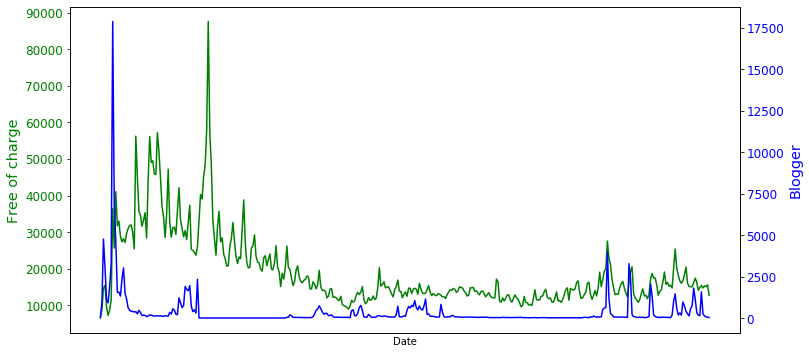

In [84]:
#plot 1
fig, ax = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax.set_xlabel('Date')
ax.tick_params(axis = 'x',
              bottom = False,
              labelbottom = False)
ax.set_ylabel('Free of charge',
             color='green',
             size = 'x-large')
ax.tick_params(axis='y',
              labelcolor = 'green',
              labelsize = 'large')
ax.plot(x1,  color = 'green')

ax_precip = ax.twinx()
ax_precip.set_ylabel ('Blogger',
                     color = 'blue',
                     size = 'x-large')
ax_precip.tick_params(axis='y',
              labelcolor = 'blue',
              labelsize = 'large')
ax_precip.plot(x2,  color='blue' )

plt.show()

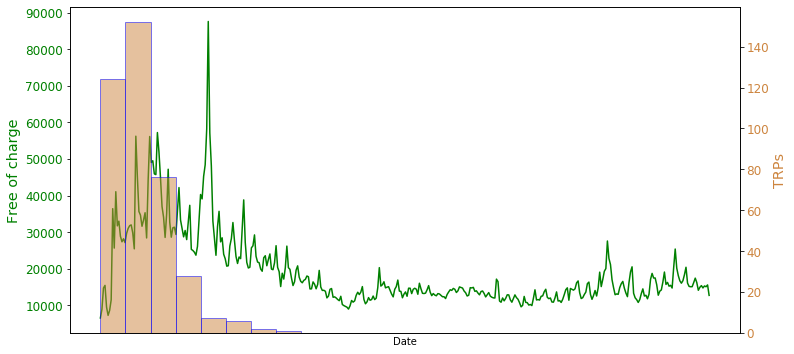

In [85]:
#plot 2
fig, az = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

az.set_xlabel('Date')
az.tick_params(axis = 'x',
              bottom = False,
              labelbottom = False)
az.set_ylabel('Free of charge',
             color='green',
             size = 'x-large')
az.tick_params(axis='y',
              labelcolor = 'green',
              labelsize = 'large')
az.plot(x1,  color = 'green')

az_precip = az.twinx()
az_precip.set_ylabel ('TRPs',
                     color = 'peru',
                     size = 'x-large')
az_precip.tick_params(axis='y',
              labelcolor = 'peru',
              labelsize = 'large')
az_precip.hist(x3,  facecolor = 'peru', edgecolor = 'blue', bins =8, alpha = 0.5 )

plt.show()